In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import re
import seaborn as sns
from PIL import Image
from pathlib import Path
from IPython.display import clear_output

from metrics import gmsd, ssim, psnr

RAW_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/raw"
STACKREG_DIR = "/Users/farhanoktavian/imperial/thesis/sandbox/dataset/stackreg"
REG_TYPE = "ptv"

In [2]:
sample_id = "HS020"

raw_sample_dir = Path(RAW_DIR) / sample_id
regstack_sample_dir = Path(STACKREG_DIR) / sample_id

raw_runs = sorted([x for x in raw_sample_dir.iterdir() if x.is_dir()])
regstack_runs = sorted([x for x in regstack_sample_dir.iterdir() if x.is_dir()])

In [3]:
run_filter = ["Run06"]
run_pairs = []
for run in regstack_runs:
    if run.name not in run_filter:
        continue
    run_id = run.name
    if run_id in [r.name for r in raw_runs]:
        run_pairs.append((run_id, raw_sample_dir / run_id, run))

In [4]:
# Left Right
def read_image(img_dir):
    img = cv2.imread(str(img_dir), cv2.IMREAD_GRAYSCALE)
    return img

for run_id, a, b in run_pairs:
    raw_images = [read_image(x) for x in sorted(a.iterdir()) if x.suffix.lower() == ".png"]

    # Need to sort by number
    regstack_paths = sorted(b.iterdir(), key=lambda f: int(re.sub('\D', '', f.name)))
    regstack_images = [read_image(x) for x in regstack_paths if x.suffix.lower() == ".png"]

    raw_length = len(raw_images)
    reg_length = len(regstack_images)
    if raw_length > 29:
        length_skip = raw_length // 29
        raw_images = raw_images[::length_skip]
    if len(regstack_images) > 29:
        length_skip = reg_length // 29
        regstack_images = regstack_images[::length_skip]

plt.close("all")
print("done")

done


In [5]:
START_LAMBDA = 440
INTERVAL = 10

raw_gmsd = np.zeros((29, 29))
raw_ssim = np.zeros((29, 29))
raw_psnr = np.zeros((29, 29))

reg_gmsd = np.zeros((29, 29))
reg_ssim = np.zeros((29, 29))
reg_psnr = np.zeros((29, 29))

for i in range(29):
    clear_output(wait=True)
    print(i)
    for j in range(i+1,29):
        raw_i = raw_images[i]
        raw_j = raw_images[j]

        reg_i = regstack_images[i]
        reg_j = regstack_images[j]

        raw_gmsd[i, j] = gmsd(raw_i, raw_j)
        raw_ssim[i, j] = ssim(raw_i, raw_j)
        raw_psnr[i, j] = psnr(raw_i, raw_j)

        reg_gmsd[i, j] = gmsd(reg_i, reg_j)
        reg_ssim[i, j] = ssim(reg_i, reg_j)
        reg_psnr[i, j] = psnr(reg_i, reg_j)

28


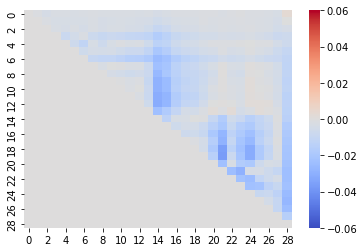

In [6]:
ax = sns.heatmap(reg_gmsd - raw_gmsd, cmap="coolwarm", vmin=-0.06, vmax=0.06)
plt.show()

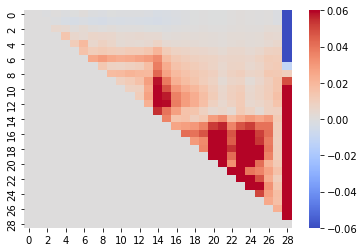

In [7]:
ax = sns.heatmap(reg_ssim - raw_ssim, cmap="coolwarm", vmin=-0.06, vmax=0.06)
plt.show()

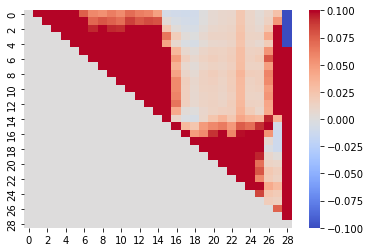

In [8]:
ax = sns.heatmap(reg_psnr - raw_psnr, cmap="coolwarm", vmin=-0.1, vmax=0.1)
plt.show()

In [9]:
print(np.mean(raw_gmsd))
print(np.mean(reg_gmsd))

print(np.mean(raw_ssim))
print(np.mean(reg_ssim))

print(np.mean(raw_psnr))
print(np.mean(reg_psnr))

0.035936240948808165
0.0321013369246498
0.22386435327194143
0.23413428016787854
8.212048647085604
8.368443087428957
